In [23]:
import sys
sys.path.append('..')

from config import *
from src.db.tools import *

import pandas as pd
import numpy as np

In [24]:
data_dict = reading_csv(SaveConfig.OUT_DIR)

machine_table = data_dict['machine_table']
truck_table = data_dict['truck_table']
path_table = data_dict['path_table']

print(f"table names: {data_dict.keys()}")

table names: dict_keys(['machine_table', 'path_table', 'pipeline_table', 'truck_table'])


## checking path

In [25]:
temp = machine_table.groupby('small_id')['equipment_id'].apply(lambda x: len(x.unique()))

In [26]:
temp.value_counts()

11    1942
10    1193
12     853
7      826
13     402
1      250
9      170
14     114
5      110
6       60
4       50
15      47
8       27
16       4
Name: equipment_id, dtype: int64

In [27]:
temp.value_counts().sum()

6048

## checking a/r m wait time

In [28]:
targe_small = machine_table[machine_table.equipment_id.str.contains('m')].small_id.unique()

target_table = machine_table[machine_table.small_id.isin(targe_small)]

ind_m = target_table.equipment_id.str.startswith('m')
ind_a = target_table.equipment_id.str.startswith('a')
ind_r = target_table.equipment_id.str.startswith('r')


ind_wait = target_table.action == 'wait'
ind_end = target_table.action == 'end'
ind_start = target_table.action == 'start'

arm_table = target_table[(ind_a & ind_end) | (ind_m & ind_start) | (ind_r & ind_end) ]

result_diff = \
    arm_table.set_index(['equipment_id', 'small_id', 'action'])['time_stamp'].diff().reset_index()

arm_table.set_index(['equipment_id', 'small_id', 'action'])\
    .groupby(level=1)['time_stamp'].apply(lambda x: x.diff()).reset_index()

result = result_diff[result_diff.action == 'start']

In [29]:
result.time_stamp.replace(0, np.nan).describe()

count    5798.000000
mean      563.346119
std      1417.851243
min        12.980000
25%        14.310000
50%        14.310000
75%        57.910000
max      7254.780000
Name: time_stamp, dtype: float64

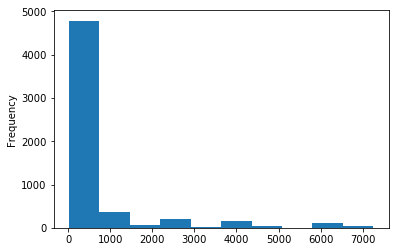

In [30]:
%matplotlib inline
result.time_stamp.plot(kind='hist')

In [31]:
result[result.time_stamp > 500]

,equipment_id,small_id,action,time_stamp
31,m2_9,254445,start,5598.78
39,m2_5,74814,start,6986.78
57,m2_3,92960,start,7232.74
67,m2_5,129036,start,3093.65
75,m2_9,274021,start,555.65
95,m3_1,141996,start,4627.52
103,m3_2,286657,start,697.78
105,m2_10,20128,start,2312.65
123,m3_1,22873,start,4627.65
127,m3_2,33856,start,1722.39


In [13]:
machine_table[machine_table.small_id == 55238]

,equipment_id,parcel_id,small_id,parcel_type,time_stamp,action,real_time_stamp,run_time
280,r3_4,55238,55238,parcel,0.000,wait,2017-07-25 21:00:00.000,2017-08-21 13:23:58.620346
281,r3_4,55238,55238,parcel,3.130,start,2017-07-25 21:00:03.130,2017-08-21 13:23:58.620346
282,r3_4,55238,55238,parcel,6.260,end,2017-07-25 21:00:06.260,2017-08-21 13:23:58.620346
283,m2_3,55238,55238,parcel,7257.910,wait,2017-07-25 23:00:57.910,2017-08-21 13:23:58.620346
284,m2_3,55238,55238,parcel,7260.910,start,2017-07-25 23:01:00.910,2017-08-21 13:23:58.620346
285,m2_3,55238,55238,parcel,7263.910,end,2017-07-25 23:01:03.910,2017-08-21 13:23:58.620346
286,j16_1,55238,55238,parcel,7405.540,wait,2017-07-25 23:03:25.540,2017-08-21 13:23:58.620346
287,j16_1,55238,55238,parcel,7405.540,start,2017-07-25 23:03:25.540,2017-08-21 13:23:58.620346
288,j16_1,55238,55238,parcel,7410.305,end,2017-07-25 23:03:30.305,2017-08-21 13:23:58.620346
289,i19_2,55238,55238,parcel,7526.535,wait,2017-07-25 23:05:26.535,2017-08-21 13:23:58.620346


## checking m j wait time

In [33]:
targe_small = machine_table[machine_table.equipment_id.str.contains('j')].small_id.unique()

target_table = machine_table[machine_table.small_id.isin(targe_small)]

ind_m = target_table.equipment_id.str.startswith('m')
ind_j = target_table.equipment_id.str.startswith('j')

ind_wait = target_table.action == 'wait'
ind_end = target_table.action == 'end'
ind_start = target_table.action == 'start'

mj_table = target_table[(ind_m & ind_end) | (ind_j & ind_start)]

result_diff = \
    mj_table.set_index(['equipment_id', 'small_id', 'action'])['time_stamp'].diff().reset_index()

mj_table.set_index(['equipment_id', 'small_id', 'action'])\
    .groupby(level=1)['time_stamp'].apply(lambda x: x.diff()).reset_index()

result = result_diff[result_diff.action == 'start']

In [34]:
result.time_stamp.replace(0, np.nan).describe()

count    1201.000000
mean     6890.700329
std      2272.872506
min       141.630000
25%      6799.770000
50%      7700.670000
75%      8159.875000
max      8709.085000
Name: time_stamp, dtype: float64

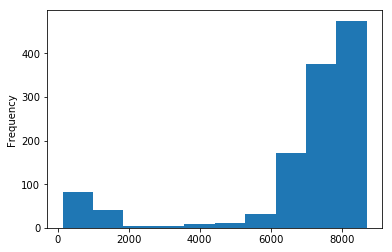

In [35]:
%matplotlib inline
result.time_stamp.plot(kind='hist')

In [39]:
result[result.time_stamp > 300].equipment_id.unique()

array(['j21_1', 'j9_1', 'j23_1', 'j15_1', 'j41_1'], dtype=object)

In [40]:
machine_table[machine_table.small_id == 695625]

,equipment_id,parcel_id,small_id,parcel_type,time_stamp,action,real_time_stamp,run_time


## checking r/a last work time

In [41]:
r_a_table = machine_table[machine_table.equipment_id.str.get(0).isin(['r', 'a'])]

r_a_table_last = r_a_table.groupby('equipment_id')['real_time_stamp'].max().reset_index()

unload_setting = get_unload_setting()

r_a_table_last['real_time_stamp'] = pd.to_datetime(r_a_table_last['real_time_stamp'])

r_a_table_last_res = \
    r_a_table_last\
        .groupby([r_a_table_last['equipment_id']\
                  .apply(lambda x: tuple(unload_setting[x])), 'equipment_id'])\
            ['real_time_stamp'].apply(lambda x: list(x)[0])

r_a_table_last_res = r_a_table_last_res.rename_axis(['unload_type', 'equipment_id']).reset_index()

cols = ['unload_type', 'real_time_stamp']

r_a_table_last_res_sort = \
    r_a_table_last_res.sort_values(cols).set_index(['unload_type', 'equipment_id'])

2017-08-21 13:43:08,312 - simulation - INFO - Reading Redis i_unload_setting


## analysis truck

In [ ]:
truck_table_end = truck_table[truck_table.action == 'end']

truck_table_end_store_count = \
    truck_table_end.groupby(
        
        [truck_table_end['equipment_id'].apply(lambda x: tuple(unload_setting[x])), 'equipment_id'])\
            ['store_size'].sum()

truck_table_end_store_count = \
    truck_table_end_store_count.rename_axis(['unload_type', 'equipment_id']).reset_index()

cols = ['unload_type', 'store_size']
truck_table_end_store_count_sort = \
    truck_table_end_store_count.sort_values(cols).set_index(['unload_type', 'equipment_id'])

truck_unload_table = \
    pd.concat([truck_table_end_store_count_sort, r_a_table_last_res_sort], axis=1)

truck_unload_table.reset_index(inplace=True)

In [ ]:
truck_unload_table.sort_values(['unload_type', 'store_size']).set_index(['unload_type', 'equipment_id'])

## j table

需要过安检的量

In [ ]:
truck_table_end[truck_table_end.truck_type == 'LA'].store_size.sum()

In [ ]:
j_table = machine_table[machine_table.equipment_id.str.contains('j')]

In [ ]:
j41_table = machine_table[machine_table.equipment_id.str.contains('j41')]

实际过安检的量

In [ ]:
len(j_table.parcel_id.unique())

过 j41 安检的量

In [ ]:
len(j41_table.parcel_id.unique())

每个安检机处理的量

In [ ]:
j_process_count = j_table.groupby('equipment_id')['parcel_id'].apply(lambda x: len(set(x)))

In [ ]:
j_process_count

# random

In [ ]:
import random

small_id_store = machine_table.small_id.unique()

In [ ]:
g = machine_table.groupby('small_id')

In [ ]:
small_id = random.choice(small_id_store)
g.get_group(small_id)

平均处理时间（总路径）

In [ ]:
table_diff = g['time_stamp'].apply(lambda x: x.max() - x.min())

In [ ]:
table_diff.describe()

In [ ]:
table_diff[table_diff > 30000]

In [ ]:
table_diff.plot(kind='hist')

In [ ]:
g.get_group(767)

## 安检机

In [ ]:
security_dict = get_equipment_store_dict()

In [ ]:
from collections import defaultdict

In [ ]:
d = defaultdict(list)

In [ ]:
for k,v in security_dict.items():
    d[v].append(k)

In [ ]:
d

In [ ]:
get_equipment_process_time()['j15_1']

In [ ]:
table_resource_limit = get_resource_limit()

In [ ]:
table_resource_limit[table_resource_limit.resource_id.str.contains('j15_1')]

## 检查开关

In [ ]:
machine_table[machine_table.equipment_id == 'a1_1']

In [ ]:
sorted(machine_table.equipment_id.unique())